# Statistical Analysis in Python

This is my notes on statistical analysis in python. Python has good statistical inference packages such as scipy.stats and statsmodel.

Topics in this notebook are: 

- random number generator and hacker statistics
- Bernoulli trials, Poisson distribution, normal distribution, exponential distribution
- Probability function 
- Generate bootstrap replicates, calculate bootstrap confidence intervals, pairs boostrap
- Formulating and simulating a null hypothesis
- Pipeline for hypothesis testing



In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy

# Random Number generator  and Probability Distribution

simulate 4 coin flips using np.random.random() and seed

In [7]:
np.random.seed(42)
random_numbers = np.random.random(size=5)
head = random_numbers < 0.5
print(head)
print('total head : ', np.sum(head))

[ True False False False  True]
total head :  2


Hacker statistic probabilities use the following procedures to calculate the probability of an event instead of directly calculate the probabilities:

1. Determine how to simulate data
2. Simulate the data many times
3. probability is ~ fraction of trials with the outcome of interest 

For example if we want to calculate the probability of getting 4 heads in 4 coin flip. 

In [13]:
n_all_head = 0 
num_trial = 10000

for _ in range(num_trial):
    heads =  np.random.random(size=4) <0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_head += 1

print('prob of 4 head : ', n_all_head/num_trial)

prob of 4 head :  0.0627


**Bernoulli trials**

You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability p of landing heads (success) and probability 1−p of landing tails (failure). Write a function to perform n Bernoulli trials, perform_bernoulli_trials(n, p), which returns the number of successes out of n Bernoulli trials, each of which has probability p of success. To perform each Bernoulli trial, use the np.random.random() function, which returns a random number between zero and one.

In [14]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0


    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number<p:
            n_success+=1

    return n_success

**How many defaults might we expect?**

Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the perform_bernoulli_trials() and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default?) Do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.

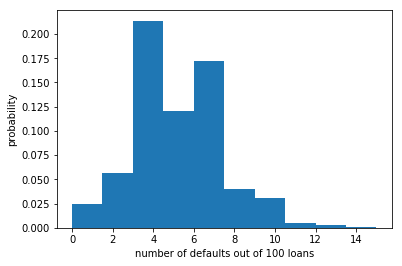

In [25]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults=np.empty(10000)

# Compute the number of defaults
for i in range(10000):
    n_defaults[i] = perform_bernoulli_trials(100,0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

In [22]:
# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money=sum(n_defaults>=10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

Probability of losing money = 0.022


## The Binomial distribution

- Probability mass function(PMF) is the set of probabilities of discrete outcomes. 
- Probability distribution is a mathematical description of outcomes. For example the outcome of rolling a single fair die is discrete uniformly distributed. 

- For Binomial distribution is a type of probability distribution defined as the number r of successes in n Bernoulli trials with probability p of success if Binomially distributed. 

The number r of heads in 4 coin filps with probability 0.5 of heads is Binomially distributed.

To sample from a Binomial distribution with 4 trials and prob = 0.5 use

In [23]:
np.random.binomial(4, 0.5)

2

We we repeat experiment many times we get 

In [26]:
np.random.binomial(4, 0.5, size=10)

array([2, 2, 0, 2, 3, 2, 3, 1, 1, 3])

To look at the distribution for 60 coin flips, and 10000 trial.

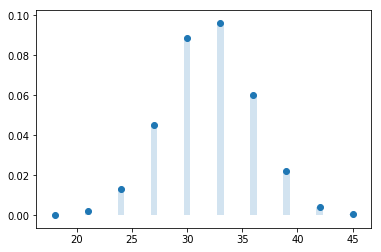

In [63]:
sample = np.random.binomial(60,0.5,size=10000)
resulted_hist = plt.hist(sample,rwidth=0.2,alpha=0.2,align='right',density=True)
plt.scatter(x=resulted_hist[1][1:],y=resulted_hist[0])

(array([3.000e-04, 7.500e-03, 4.770e-02, 1.835e-01, 4.500e-01, 7.384e-01,
        9.182e-01, 9.854e-01, 9.978e-01, 1.000e+00]),
 array([15., 18., 21., 24., 27., 30., 33., 36., 39., 42., 45.]),
 <a list of 1 Patch objects>)

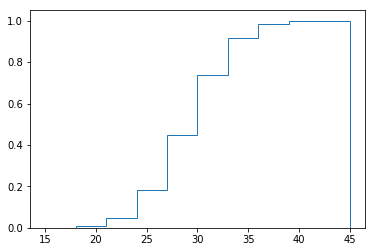

In [68]:
# plotting the cdf instead 
plt.hist(sample, density=True, cumulative=True,histtype='step')

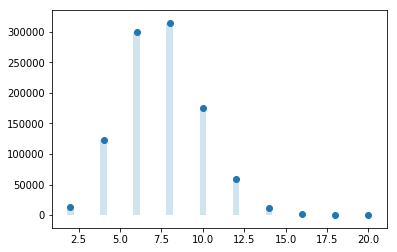

In [57]:
sample = np.random.binomial(60,0.1,size=1000000)
resulted_hist = plt.hist(sample,rwidth=0.2,alpha=0.2,align='right')
plt.scatter(x=resulted_hist[1][1:],y=resulted_hist[0])

**Sampling out of the Binomial distribution**

Compute the probability mass function for the number of defaults we would expect for 100 loans similar to previous section, but instead of simulating all of the Bernoulli trials, perform the sampling using np.random.binomial(). After taking the samples, plot the CDF. This CDF that you are plotting is that of the Binomial distribution.

In [86]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, (n+1)) / n

    return x, y

Text(0, 0.5, 'ecdf')

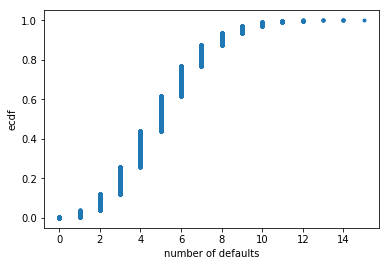

In [87]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults=np.random.binomial(n=100,p=0.05,size=10000)

x,y=ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x,y,marker='.',linestyle='none')
plt.xlabel('number of defaults')
plt.ylabel('ecdf')

ecdf is not the same as cdf as shown here 

Text(0, 0.5, 'cdf')

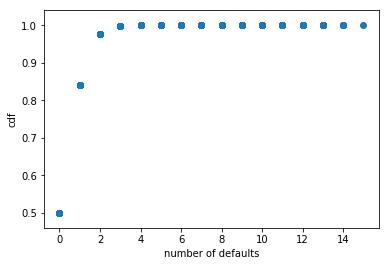

In [102]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults=np.random.binomial(n=100,p=0.05,size=10000)

y = scipy.stats.norm.cdf(n_defaults)

# Plot the CDF with axis labels
plt.scatter(n_defaults,y=y)
plt.xlabel('number of defaults')
plt.ylabel('cdf')

**Plotting the Binomial PMF** 

C:\Users\Benny\Anaconda3\envs\fastai\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


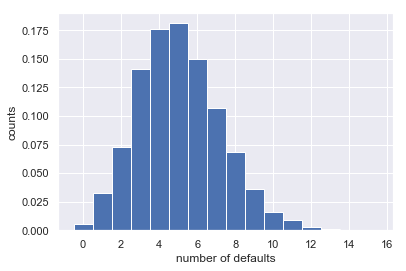

In [104]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

sns.set()
# Generate histogram
plt.hist(n_defaults,normed=True, bins=bins)

# Label axes
plt.xlabel('number of defaults')
plt.ylabel('counts')

# Show the plot
plt.show()

## Possion Processes and Possion Distribution

**Possion Process**
- The timing of the next event is completely independent of when the previous event happened
- EX: natural births in a given hospital, hit on a website during a given hour, molecular collisions in a gas, aviation incidents 

The number of arrival of a Possion process in a given time is Poisson distributed. 

Ex The number r of hits on a website in a hour with average hit of $\lambda =$ 6 hits per hour is Poisson distributed.

Poisson distribution is a limit of Binomial distribution for low probability of success and large number of trials (rare events). 

Text(0, 0.5, 'CDF')

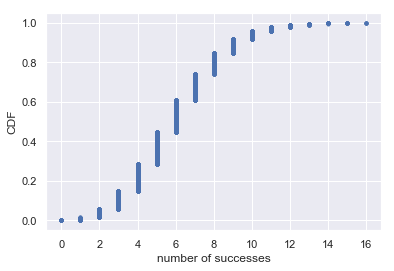

In [106]:
samples = np.random.poisson(6, size=10000)
x,y = ecdf(samples)
plt.plot(x,y, marker='.', linestyle='none')
plt.xlabel('number of successes')
plt.ylabel('CDF')

Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is just like the Poisson story we discussed in the video, where we get on average 6 hits on a website per hour. So, the Poisson distribution with arrival rate equal to np approximates a Binomial distribution for n Bernoulli trials with probability p of success (with n large and p small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

In [107]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson=np.random.poisson(10,size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n=[20,100,1000]
p=[0.5,0.1,0.01]


# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i],p[i],size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson:      9.9236 3.16401059416684
n = 20 Binom: 9.9829 2.221487697467623
n = 100 Binom: 10.0607 3.0064955529652795
n = 1000 Binom: 9.9882 3.1646580794771495


The std of the binomial distribution is closer to Poisson when p is low and n is high. 

In baseball, a no-hitter is a game in which a pitcher does not allow the other team to get a hit. This is a rare event, and since the beginning of the so-called modern era of baseball (starting in 1901), there have only been 251 of them through the 2015 season in over 200,000 games.


Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

In [108]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters=np.random.poisson(251/115,size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters>=7)

# Compute probability of getting seven or more: p_large
p_large=n_large/10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)


Probability of seven or more no-hitters: 0.0062


## Probability density functions 

- Probability density of a continuous variable (continuous analog of the PMF)
- Ex: normal distribution 
- probability that the value falled into a certain range is an area under curve or can be read directly from CDF.
- To check if something is normally distributed, extract the mean and std and plot it again the theoretical CDF normal distribution. 

**Are the Belmont Stakes results Normally distributed?**

Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times. Sample out of a Normal distribution with this mean and standard deviation using the np.random.normal() function and plot a CDF. Overlay the ECDF from the winning Belmont times. Are these close to Normally distributed?

In [115]:
belmont = pd.read_csv('data/belmont.csv')
belmont = belmont.set_index('Year')
belmont.drop(1970,inplace=True)
belmont.head()

,Winner,Jockey,Trainer,Owner,Time,Track,miles
Year,,,,,,,
2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,2:28.51,Belmont,1.5
2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",2:26.65,Belmont,1.5
2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,2:28.52,Belmont,1.5
2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,2:30.70,Belmont,1.5
2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,2:30.42,Belmont,1.5


In [149]:
# find the time to complete 1.5 miles in second
belmont['Timesec'] = belmont['Time'].str.split(":",n=1,expand=True)[0].astype(float)*60 + belmont['Time'].str.split(":",n=1,expand=True)[1].astype(float)
belmont_no_outliers = belmont['Timesec'].values

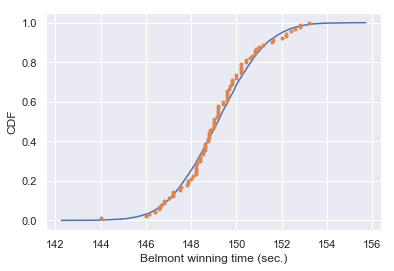

In [151]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma=np.std(belmont_no_outliers)


# Sample out of a normal distribution with this mu and sigma: samples
samples=np.random.normal(mu,sigma,size=10000)

# Get the CDF of the samples and of the data
x_theor,y_theor=ecdf(samples)
x,y=ecdf(belmont_no_outliers)


# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


## Exponential Distribution

- The waiting time between arrivals of a Poission process is Exponentially distributed
- Take one parameter: mean waiting time


Earlier, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see both a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

Now, you will write a function to sample out of the distribution described by this story.

In [152]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1,size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

Now, use sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

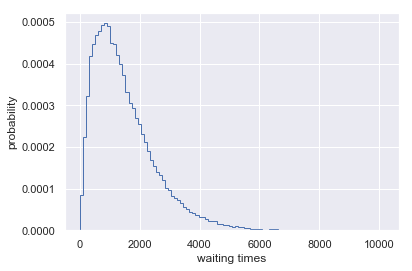

In [154]:
# Draw samples of waiting times: waiting_times
waiting_times=successive_poisson(764,715,size=100000)

# Make the histogram
plt.hist(waiting_times,bins=100,density=True,histtype='step')


# Label axes
plt.xlabel('waiting times')
plt.ylabel('probability')

# Show the plot
plt.show()

**How often do we get no-hitters

The number of games played between each no-hitter in the modern era (1901-2015) of Major League Baseball is stored in the array nohitter_times.

If you assume that no-hitters are described as a Poisson process, then the time between no-hitters is Exponentially distributed. As you have seen, the Exponential distribution has a single parameter, which we will call τ, the typical interval time. The value of the parameter τ that makes the exponential distribution best match the data is the mean interval time (where time is in units of number of games) between no-hitters.

Compute the value of this parameter from the data. Then, use np.random.exponential() to "repeat" the history of Major League Baseball by drawing inter-no-hitter times from an exponential distribution with the τ you found and plot the histogram as an approximation to the PDF.

In [157]:
no_hitter = pd.read_csv('data/mlb_nohitters.csv')
no_hitter.tail()

,date,game_number,winning_team,losing_team,winning_pitcher
289,20150725,210250,PHI,CHN,Cole Hamels
290,20150812,210490,SEA,BAL,Hisashi Iwakuma
291,20150821,210610,HOU,LAN,Michael Fiers
292,20150830,210740,CHN,LAN,Jake Arrieta
293,20151003,211208,WAS,NYN,Max Scherzer


In [166]:
nohitter_times = no_hitter['game_number'].diff().dropna().values

C:\Users\Benny\Anaconda3\envs\fastai\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


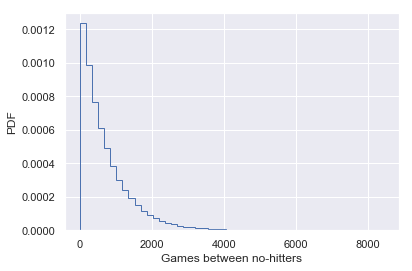

In [167]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, normed=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


Create an ECDF of the real data. Overlay the theoretical CDF with the ECDF from the data. This helps you to verify that the Exponential distribution describes the observed data.

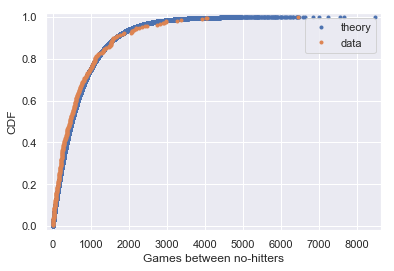

In [171]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor,marker='.',linestyle='none',label='theory')
plt.plot(x, y, marker='.', linestyle='none',label='data')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')
plt.legend()

# Show the plot
plt.show()


**How is this parameter optimal?**

Now sample out of an exponential distribution with τ being twice as large as the optimal τ. Do it again for τ half as large. Make CDFs of these samples and overlay them with your data. You can see that they do not reproduce the data as well. Thus, the τ you computed from the mean inter-no-hitter times is optimal in that it best reproduces the data.

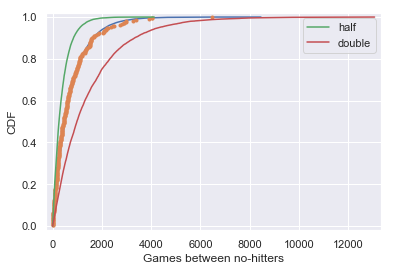

In [174]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2,10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(tau*2,10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half,label='half')
_= plt.plot(x_double, y_double,label='double')
plt.legend()
# Show the plot
plt.show()

# Bootstrap confidence intervals

## Generate bootstrap replicates

**Visualizing bootstrap samples**

In this exercise, you will generate bootstrap samples from the set of annual rainfall data measured at the Sheffield Weather Station in the UK from 1883 to 2015. The rainfall is in millimeters. By graphically displaying the bootstrap samples with an ECDF, you can get a feel for how bootstrap sampling allows probabilistic descriptions of data.

In [213]:
rainfall_df = pd.read_csv('data/sheffield_weather_station.csv',skiprows=8,sep='   ',engine='python')
rainfall_df.head()

,yyyy mm,tmax,tmin,Unnamed: 3,af,rain,sun
1883,1,6.3,1.7,NaN,6,122.1,---
1883,2,8.0,2.8,NaN,2,69.8,---
1883,3,4.8,-1.6,NaN,23,29.6,---
1883,4,12.2,3.8,NaN,2,74.0,---
1883,5,14.7,6.2,NaN,0,31.2,---


In [219]:
rainfall_df.iloc[:,5].unique()

array(['122.1', ' 69.8', ' 29.6', ' 74.0', ' 31.2', ' 66.2', ' 77.6',
       ' 32.5', '137.4', '  ---', '127.7', ' 49.4', ' 50.4', ' 48.0',
       ' 33.1', ' 39.7', ' 80.1', ' 36.8', ' 34.0', ' 56.9', ' 76.4',
       ' 41.6', ' 49.5', ' 58.1', ' 17.8', ' 59.5', ' 85.3', '121.8',
       ' 14.2', ' 84.8', ' 47.5', '181.0', ' 26.5', ' 94.2', ' 49.7',
       ' 30.8', ' 61.2', ' 13.6', ' 42.5', ' 26.3', ' 46.6', ' 11.2',
       ' 25.2', ' 40.7', ' 57.2', ' 22.1', ' 98.1', ' 52.6', ' 16.3',
       ' 61.8', '129.3', ' 61.1', ' 22.9', ' 39.0', ' 50.8', '107.6',
       ' 92.0', ' 97.7', '  6.1', ' 62.8', ' 69.6', ' 46.8', '103.7',
       ' 21.4', ' 62.9', ' 20.8', ' 79.9', ' 48.4', ' 57.4', ' 78.2',
       ' 37.5', '  1.8', ' 53.6', ' 53.0', ' 86.8', ' 89.2', ' 57.6',
       ' 83.5', ' 58.5', ' 63.1', ' 89.8', ' 33.7', ' 24.0', '102.4',
       '104.0', ' 80.2', ' 69.1', ' 88.6', ' 47.2', '112.0', ' 19.8',
       ' 19.5', ' 73.7', ' 77.3', ' 77.1', '132.1', ' 70.0', ' 49.1',
       ' 60.6', ' 83

In [230]:
rainfall_df.iloc[:,5] = rainfall_df.iloc[:,5].replace('  ---', np.nan)
rainfall = rainfall_df.iloc[:,5].dropna().astype(float).values

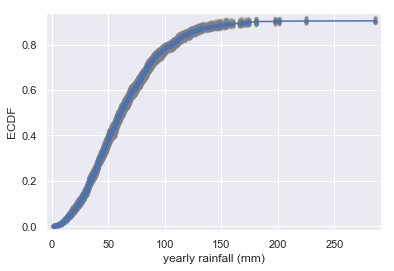

In [223]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

## Bootstrap confidence intervals

**Confident interval of a statistic**
- If we repeated measuremets over and over again, p% of the observed values would lie withint the p% confident inverval. For example, 95% of the means calculated from bootstrapping the data would lie in the 95% confident interval. 

In [224]:
# define function to generate a bootstrap replicate and return the statistic 
def bootstrap_replicate_1d(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [226]:
# function that generates many bootstrap statistic from the data set.
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

**Bootstrap replicates of the mean and the SEM** 

In this exercise, you will compute a bootstrap estimate of the probability density function of the mean annual rainfall at the Sheffield Weather Station. Remember, we are estimating the mean annual rainfall we would get if the Sheffield Weather Station could repeat all of the measurements from 1883 to 2015 over and over again. This is a probabilistic estimate of the mean. You will plot the PDF as a histogram, and you will see that it is Normal.

In fact, it can be shown theoretically that under not-too-restrictive conditions, the value of the mean will always be Normally distributed. (This does not hold in general, just for the mean and a few other statistics.) The standard deviation of this distribution, called the standard error of the mean, or SEM, is given by the standard deviation of the data divided by the square root of the number of data points. I.e., for a data set, sem = np.std(data) / np.sqrt(len(data)). Using hacker statistics, you get this same result without the need to derive it, but you will verify this result from your bootstrap replicates.

0.9167083507863152
0.9308346108954332


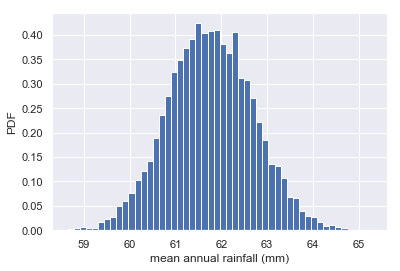

In [232]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall,np.mean,10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

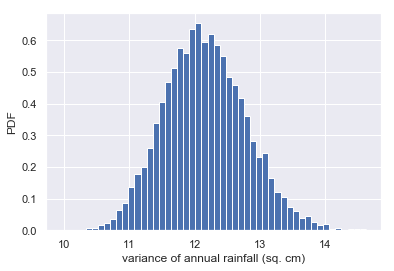

In [234]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall,np.var,10000)

# Put the variance in units of square centimeters
bs_replicates=bs_replicates/100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

**Confidence intervals data**

A confidence interval gives upper and lower bounds on the range of parameter values you might expect to get if we repeat our measurements. For named distributions, you can compute them analytically or look them up, but one of the many beautiful properties of the bootstrap method is that you can take percentiles of your bootstrap replicates to get your confidence interval. Conveniently, you can use the np.percentile() function

Generate 10,000 bootstrap replicates of the optimal parameter τ. Plot a histogram of your replicates and report a 95% confidence interval.

95% confidence interval = [628.11552901 820.44377133] games


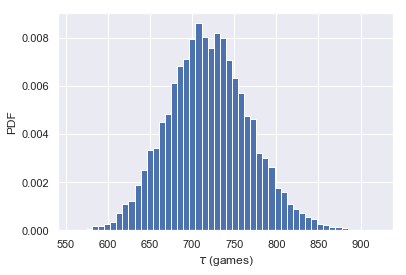

In [236]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times,np.mean,10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates,[2.5,97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

## Pairs bootstrap

**Nonparametric inference**

- make no assumptions about the model or probability distribution of the data 

**Pairs Bootstrap for linear regression**
- Resample data in pairs. Resample each (x,y) pair by resample their indices.
- Fit linear curve between x and y
- Each slope and intercept is a bootstrap replicate 
- Compute confidence intervals from percentiles from bootstrap replicates 

In [242]:
femal_df = pd.read_csv('data/female_literacy_fertility.csv')
illiteracy = femal_df['female literacy'].values
fertility = femal_df['fertility'].values
femal_df.head()

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,"1,324,655,000"
1,Inde,ASI,50.8,2.682,"1,139,964,932"
2,USA,NAM,99.0,2.077,"304,060,000"
3,Indonésie,ASI,88.8,2.132,"227,345,082"
4,Brésil,LAT,90.2,1.827,"191,971,506"


In [238]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps

Pairs bootstrap of literacy/fertility data

[-0.05545835 -0.04439127]


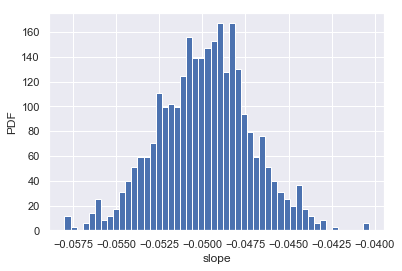

In [245]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy,fertility,1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, density=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

Plotting bootstrap regressions

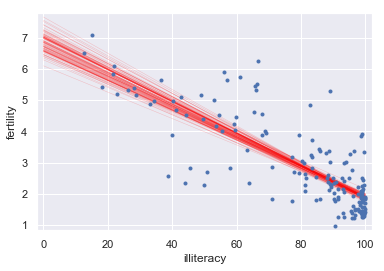

In [244]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy,fertility,marker='.',linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

# Formulating and simulating a hypothesis

**Hypothesis Testing**
- Assessment of how reasonable the observed data are assuming a hypothesis is true. The hypothesis is typically called null hypothesis. 
- The summary statistic, and the ecdf are pretty close. It is hard to judge by eye balling if two sets of data are the same or not. 
- Instead, simulating the data assuming the hypothesis is true. 

Example: want to see if two data sets are the same. This is done by putting the data to geter and permute their order as if the data points are from the same set. 

Permutation sampling is a great way to simulate the hypothesis that two variables have identical probability distributions. This is often a hypothesis you want to test, so in this exercise, you will write a function to generate a permutation sample from two data sets.

In [246]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

Generate permutation samples of Sheffield Weather Station data in June (a dry month) and November (a wet month). We expect these might be differently distributed, so we will take permutation samples to see how their ECDFs would look if they were identically distributed

In [271]:
rainfall_df = pd.read_csv('data/sheffield_weather_station.csv',skiprows=8,engine='python')
rainfall_df.head()

,yyyy mm tmax tmin af rain sun
0,1883 1 6.3 1.7 6 122.1 ...
1,1883 2 8.0 2.8 2 69.8 ...
2,1883 3 4.8 -1.6 23 29.6 ...
3,1883 4 12.2 3.8 2 74.0 ...
4,1883 5 14.7 6.2 0 31.2 ...


In [306]:
rainfall_df.iloc[:,0].str.replace('  ',';'
                                 ).str.replace(';;;',';'
                                              ).str.replace(';;',';'
                                                           ).to_csv('data/rainfall_clean.csv',index=False,header=True)

In [309]:
rainfall_df = pd.read_csv('data/rainfall_clean.csv',sep=';').reset_index()
rainfall_df.head()

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,yyyy mm tmax tmin af rain sun
0,NaN,1883,1,6.3,1.7,6,122.1,---
1,NaN,1883,2,8.0,2.8,2,69.8,---
2,NaN,1883,3,4.8,-1.6,23,29.6,---
3,NaN,1883,4,12.2,3.8,2,74.0,---
4,NaN,1883,5,14.7,6.2,0,31.2,---


In [318]:
rainfall_df[rainfall_df['level_6'].isna()]

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,yyyy mm tmax tmin af rain sun


In [319]:
rain_june = rainfall_df[rainfall_df['level_2']==6]['level_6'].values
rain_november = rainfall_df[rainfall_df['level_2']==11]['level_6'].values

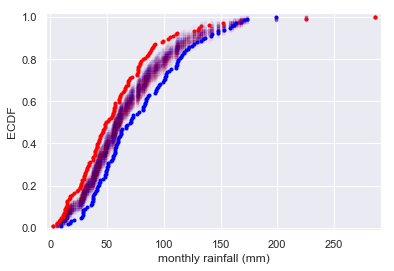

In [320]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june,rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

Notice that the permutation samples ECDFs overlap and give a purple haze. None of the ECDFs from the permutation samples overlap with the observed data, suggesting that the hypothesis is not commensurate with the data. July and November rainfall are not identically distributed.

## Test Statistic and p-value

- **Test statistic** is a single number that can be computed from observe data and from data you simulate under the null hypothesis 
- Serves as a basic for comparison between what the hypothesis predicts and what we actually observe

**P-value** is the probability of obtaining a value of your test statistic that is at least as extreme as what was observed, under the assumption the hypothesis is true. p-value is not the probability is that the null hypothesis is true.



In [321]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

Kleinteich and Gorb (Sci. Rep., 4, 5225, 2014) performed an interesting experiment with South American horned frogs. They held a plate connected to a force transducer, along with a bait fly, in front of them. They then measured the impact force and adhesive force of the frog's tongue when it struck the target.

Frog A is an adult and Frog B is a juvenile. The researchers measured the impact force of 20 strikes for each frog. In the next exercise, we will test the hypothesis that the two frogs have the same distribution of impact forces. But, remember, it is important to do EDA first! Let's make a bee swarm plot for the data. 

In [332]:
frog = pd.read_csv('data/frog_tongue.csv',skiprows=14)
frog.head()

,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa)
0,2013_02_26,I,3,1205,46,1.95,-785,884,1.27,-0.290,387,70,0.82,3117,-2030
1,2013_02_26,I,4,2527,44,4.08,-983,248,1.59,-0.181,101,94,0.07,24923,-9695
2,2013_03_01,I,1,1745,34,2.82,-850,211,1.37,-0.157,83,79,0.05,21020,-10239
3,2013_03_01,I,2,1556,41,2.51,-455,1025,0.74,-0.170,330,158,0.52,4718,-1381
4,2013_03_01,I,3,493,36,0.80,-974,499,1.57,-0.423,245,216,0.12,2012,-3975


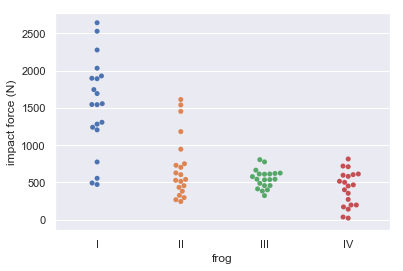

In [325]:
# Make bee swarm plot
_ = sns.swarmplot(x='ID',y='impact force (mN)',data=frog)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()


In [333]:
frog[['impact force (mN)','ID']].groupby('ID').mean()

,impact force (mN)
ID,
I,1530.20
II,707.35
III,550.10
IV,419.10


In [334]:
frog = frog[frog['ID'].isin(['II','IV'])]

**Permutation test on frog data**

The average strike force of Frog A was 0.71 Newtons (N), and that of Frog B was 0.42 N for a difference of 0.29 N. It is possible the frogs strike with the same force and this observed difference was by chance. You will compute the probability of getting at least a 0.29 N difference in mean strike force under the hypothesis that the distributions of strike forces for the two frogs are identical. We use a permutation test with a test statistic of the difference of means to test this hypothesis.

In [336]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff

In [337]:
force_a = frog[frog['ID']=='II']['impact force (mN)'].values
force_b = frog[frog['ID']=='IV']['impact force (mN)'].values

In [338]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a,force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >=empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)


p-value = 0.0061


The p-value tells you that there is about a 0.6% chance that you would get the difference of means observed in the experiment if frogs were exactly the same. A p-value below 0.01 is typically said to be "statistically significant," but: warning! warning! warning! You have computed a p-value; it is a number. I encourage you not to distill it to a yes-or-no phrase. p = 0.006 and p = 0.000000006 are both said to be "statistically significant," but they are definitely not the same!


# Pipeline for hypothesis testing

1. Clearly state the null hypothesis 
2. Define your test statistic
3. Generate many sets of simulated data assuming the null hypotheiss is true
4. Compute the test statistic for each simulated data set 
5. The p-value is the fraction of your simulated data sets for which the test statistic is at least as extreme as for the real data. 

EX. Hypothesis 

The true mean speed of light in Michelson's experiments was actually Newcomb's reported value (299860 km/s). 

This is done by 
1. shift Michelson's data to have the same mean as Newcomb's
2. Boostrap the shifted data under the assumption under the null hypothesis. 
3. Calculate the test statistic, which is different between the bootstrap of the shifted data and Newcomb 
4. Compute the p-value for many boostraps 


In [340]:
michelson = pd.read_csv('data/michelson_speed_of_light.csv')
michelson.head(2)

,Unnamed: 0,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s),remarks
0,0,June 5,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.
1,1,June 7,2,72,114.64,0.074,114.56,0.10,1.533,-0.084,257.52,28.655,0.99614,299740,P.M. Frame inclined at various angles


In [342]:
michelson_speed = michelson['velocity of light in air (km/s)'].values

In [345]:
michelson_speed.mean()

299852.4

In [346]:
newcomb_value = 299860 #km/s
michelson_shifted = michelson_speed  - np.mean(michelson_speed) + newcomb_value

In [347]:
def diff_from_newcomb(data,newcomb_value=299860):
    return np.mean(data) - newcomb_value

In [351]:
diff_observed = diff_from_newcomb(michelson_speed)

In [350]:
bs_replicates = draw_bs_reps(michelson_shifted,diff_from_newcomb, 10000)

In [353]:
p_value = np.sum(bs_replicates<= diff_observed)/10000
print(p_value)

0.1642


p-value of 0.16 this mean that their data are quite similar. 

EX. A one-sample bootstrap hypothesis test

Another juvenile frog was studied, Frog C, and you want to see if Frog B and Frog C have similar impact forces. Unfortunately, you do not have Frog C's impact forces available, but you know they have a mean of 0.55 N. Because you don't have the original data, you cannot do a permutation test, and you cannot assess the hypothesis that the forces from Frog B and Frog C come from the same distribution. You will therefore test another, less restrictive hypothesis: The mean strike force of Frog B is equal to that of Frog C.

To set up the bootstrap hypothesis test, you will take the mean as our test statistic. Remember, your goal is to calculate the probability of getting a mean impact force less than or equal to what was observed for Frog B if the hypothesis that the true mean of Frog B's impact forces is equal to that of Frog C is true. You first translate all of the data of Frog B such that the mean is 0.55 N. This involves adding the mean force of Frog C and subtracting the mean force of Frog B from each measurement of Frog B. This leaves other properties of Frog B's distribution, such as the variance, unchanged.

In [355]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b+(550-np.mean(force_b))

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)


p =  0.0046


The low p-value suggests that the null hypothesis that Frog B and Frog C have the same mean impact force is false.

Ex A two-sample bootstrap hypothesis test for difference of means

We now want to test the hypothesis that Frog A and Frog B have the same mean impact force, but not necessarily the same distribution, which is also impossible with a permutation test.

To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

In [361]:
forces_concat = np.concatenate((force_a,force_b))

In [362]:
#Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b -np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, 10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(force_a) -np.mean(force_b)) / 10000
print('p-value =', p)

p-value = 0.0056


Similarly, the low p-value suggests that the null hypothesis that Frog B and Frog C have the same mean impact force is false.